## Final Project Submission

Please fill out:
* Student name: __Marvin O. Agumba__
* Student pace: __Part Tme__
* Scheduled project review date/time: __10th February 2023__
* Instructor name: 
* Blog post URL:


# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don't know anything about creating movies. You are charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Below are the Data files we are going to use in our analysis:
- imdb.title.basics
- imdb.title.ratings
- bom.movie_gross

## Methodology
Steps we shall take:
1. Importing Libraries
2. Loading Datasets
3. Data Exploration (Reading, Merging & Cleaning)
4. Data Visualization
5. Recomendations
6. Conclussion

### Importing Libraries

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Datasets

In [2]:
movies = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
movies

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [3]:
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
revenues = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
revenues

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
revenues2 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
revenues2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Data Exploration

### Merging Datasets

Merging multiple datasets with similar attributes to form one large dataset that we shall further subject to exploration\
*merging 'movies' dataset with ratings dataset as they both have similar column 'tconst'*

In [6]:
mov_rats = pd.merge(movies,ratings)
mov_rats

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


Now we are going to merge our 'mov_rats' dataset with 'revenues' dataset to incorporate additional information from\
columns with similar attributes in both datasets\
__Assumption__ 'primary_title' column in 'mov_rats' dataset similar to 'title' column in 'revenues' dataset

In [7]:
#renaming primary_title column
mov_rats.rename(columns={"primary_title":"title"}, inplace=True)
mov_rats

#merge 'mov_rats' dataset with 'revenues' dataset to obtain our data

data = pd.merge(mov_rats,revenues)
data

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   title            3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


Our data has 3027 rows of data. Likewise, 'foreign_gross' data type reflecting 'object' needs to be changed to reflect a numeric. 5 Columns contain missing values (runtime_minutes, genres, studio, domestic_gross, foreign_gross).

Before dealing with missing values, we shall check for any duplicates & delete.

## Cleaning Dataset

### Removing Duplicates

In [9]:
#identify duplicate data
dup_rows = data[data.duplicated()]
dup_rows

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year


In [10]:
print("Number of Duplicates:", data.duplicated().sum())

Number of Duplicates: 0


In [11]:
data = data.drop_duplicates()

### Dropping Unwanted Columns

'tconts','original_title' columns adds no value to our data set hence we shall rop them. Two years in datast, 'start_year' and 'year', we shall go ahead and drop 'start_year' because it is misleading due to its inconsistency (same attribute different 'start_year')

In [12]:
# dropping 'tconts' column
data = data.drop('tconst', axis=1)

In [13]:
# dropping 'original_title' column
data = data.drop('original_title', axis=1)

In [14]:
# dropping 'start_year' column
data = data.drop('start_year', axis=1)

In [20]:
data

,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,Wazir,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...
3022,The Chambermaid,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,How Long Will I Love U,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,Helicopter Eela,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,Last Letter,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


### Dealing with missing values

In [21]:
#checking for missing values in the dataset
print("Any missing value?", data.isna().values.any())

Any missing value? True


In [22]:
data.isna().sum()

title                 0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

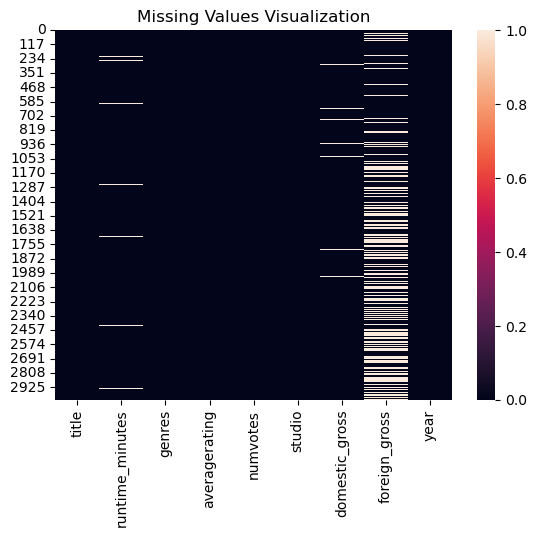

In [23]:
#visualize missing values using seaborn heatmap
sns.heatmap(data.isna())
plt.title("Missing Values Visualization")
plt.show()

In [24]:
#Representing missing values as a percentage
missing_per = data.isna().sum()*100/len(data)
missing_per

title               0.000000
runtime_minutes     1.552692
genres              0.231252
averagerating       0.000000
numvotes            0.000000
studio              0.099108
domestic_gross      0.726792
foreign_gross      39.478031
year                0.000000
dtype: float64

Drop All rows with Missing Values in Dataset\
Save for foreign gross, the other missing values consitute to only 1% of the dataset. We can confidently drop them at this stage

In [25]:
data = data.dropna(axis=0) #drop rows containing containing missing values
data

,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...
3008,Detective Chinatown 2,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
3010,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
3017,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
3023,How Long Will I Love U,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


In [26]:
data.isna().sum() #Confirming we do not have any missing values in our final dataset

title              0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [38]:
data = data.reset_index(drop=True)
data

,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
1,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
2,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
3,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
4,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...
1762,Detective Chinatown 2,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
1763,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
1764,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
1765,How Long Will I Love U,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


In [39]:
#changing foreign_gross from object to numeric
data['foreign_gross'] = data['foreign_gross'].str.replace('$','').str.replace(',','').str.replace('.','').astype('int')

AttributeError: Can only use .str accessor with string values!

In [40]:
data.dtypes

title               object
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
studio              object
domestic_gross     float64
foreign_gross        int32
year                 int64
dtype: object

__Final Data__

In [41]:
data

,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
1,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
2,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
3,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
4,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...
1762,Detective Chinatown 2,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
1763,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
1764,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
1765,How Long Will I Love U,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


__Getting the overall statistics about the dataset__

In [82]:
data.describe() # displays statistics of numerical columns

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,1767.000000,1767.000000,1.767000e+03,1.767000e+03,1.767000e+03,1767.000000
mean,107.895869,6.459706,9.692010e+04,5.008103e+07,7.959584e+07,2013.666101
std,20.105904,0.991033,1.539057e+05,8.101089e+07,1.403646e+08,2.572505
min,3.000000,1.600000,5.000000e+00,4.000000e+02,6.000000e+02,2010.000000
25%,95.000000,5.900000,6.392500e+03,1.300000e+06,4.900000e+06,2011.000000
50%,106.000000,6.500000,3.987000e+04,2.110000e+07,2.150000e+07,2014.000000
75%,119.000000,7.100000,1.171330e+05,6.120000e+07,8.195000e+07,2016.000000
max,272.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


__Interpretaition of above statistics:__\
*Data set contains movies from year 2010 (min) to 2018 (max)\
Average rating is 6.5 with minimum rating at 1.6 and maximum rating at 9.2\
Average movies running time is 108 mins with minimum at 3 mins and maximum at 272 mins*


## Data Visualization

### Movies Released Per Year

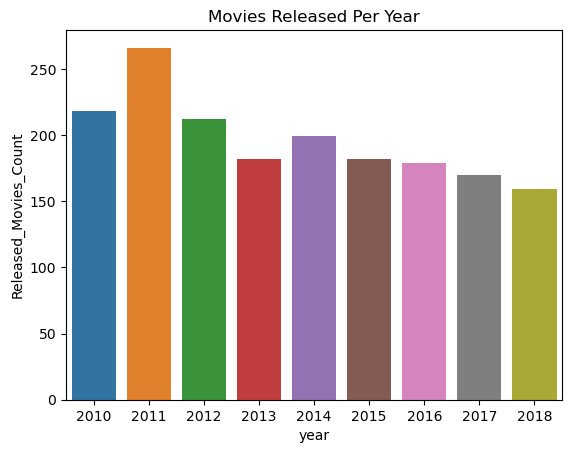

In [49]:
#Number of movies released per year
sns.countplot(x='year',data=data)
plt.ylabel('Released_Movies_Count')
plt.title ("Movies Released Per Year")
plt.show()

From above, we can see that number of box office movies released each year has been on a downward trajectory - this can be explained by the rise of streaming sites. With technological advancements, consumers streaming movies at the comfort of their homes as opposed to physically going to movie theatres. 

### Reveunes

In [54]:
#average revenues generated annually
#avr_rev = data.groupby('year')['foreign_gross'].mean().sort_values(ascending=False)
avr_rev = data.groupby('year')['foreign_gross'].mean()

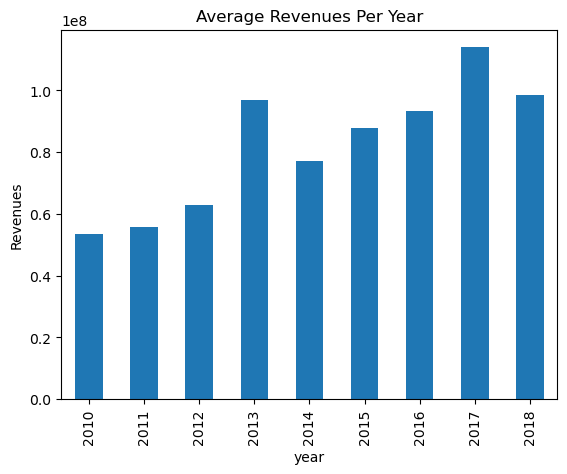

In [56]:
avr_rev.plot(kind='bar')
plt.ylabel('Revenues')
plt.title('Average Revenues Per Year')
plt.show()

Gross average revenues has been on steady rise up untill 2018 when dip was recorded. Probable causes might be rise in streaming sites, low reception from key foreign populous markets e.g China amongst others.

### Checking relationship of ratings & votes with revenues

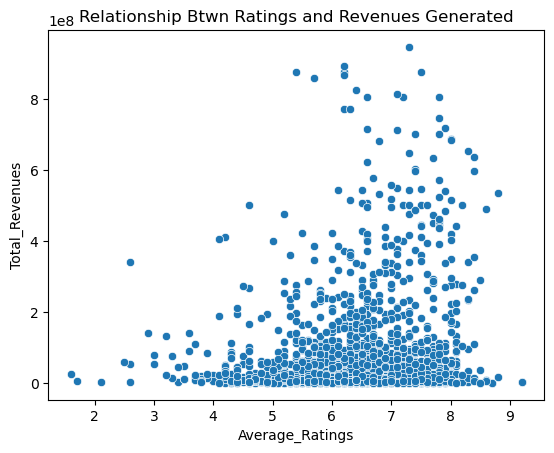

In [46]:
#checking relationship between variables
sns.scatterplot(x='averagerating', y='foreign_gross', data=data)
plt.xlabel('Average_Ratings')
plt.ylabel('Total_Revenues')
plt.title("Relationship Btwn Ratings and Revenues Generated")
plt.show()

Low positive correlation between ratings and gross revenues\
__Higher ratings does not necessarily translate to increased gross revenues__

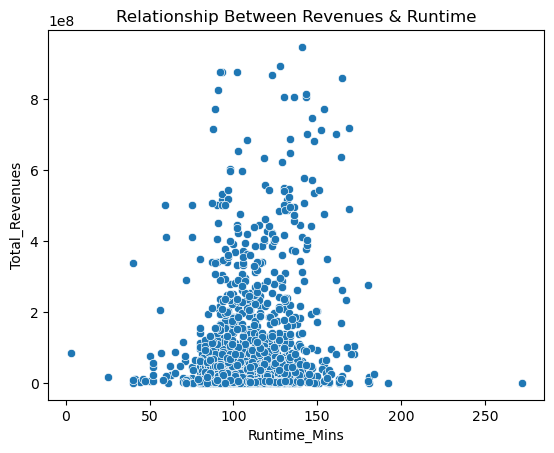

In [60]:
#checking relationship between variables
sns.scatterplot(x='runtime_minutes', y='foreign_gross', data=data)
plt.xlabel('Runtime_Mins')
plt.ylabel('Total_Revenues')
plt.title("Relationship Between Revenues & Runtime")
plt.show()

Not strong correlation between runtime & gross revenues.\
Average runtime for a movie is 108 minutes however there is not strong correlation between runtime and gross revnues nor ratings

### Other Visualizations

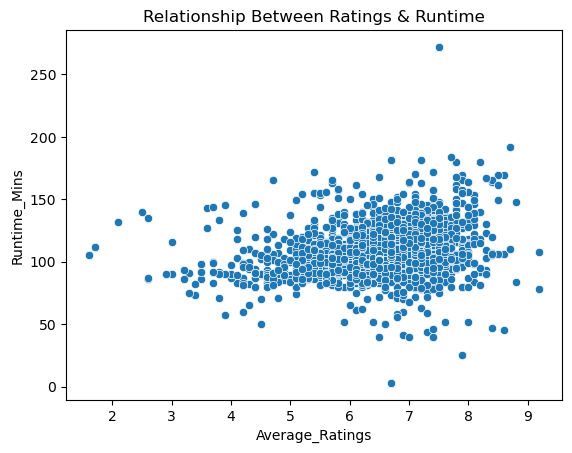

In [63]:
#checking relationship between variables
sns.scatterplot(x='averagerating', y='runtime_minutes', data=data)
plt.xlabel('Average_Ratings')
plt.ylabel('Runtime_Mins')
plt.title("Relationship Between Ratings & Runtime")
plt.show()

No correlation between ratings & runtime

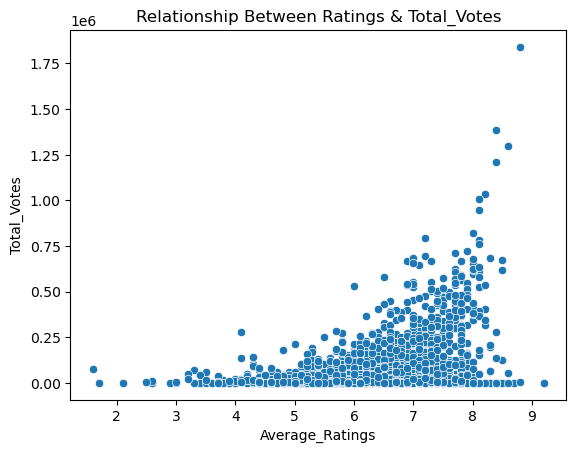

In [158]:
#checking relationship between variables
sns.scatterplot(x='averagerating', y='numvotes', data=data)
plt.xlabel('Average_Ratings')
plt.ylabel('Total_Votes')
plt.title("Relationship Between Ratings & Total_Votes")
plt.show()

Low positive correlation between ratings & number of votes

### Top Grossing Movies

In [67]:
#Top 10 grossing genres
top_gnres = data.nlargest(10,'domestic_gross')[['genres','domestic_gross']]\
.set_index('genres')

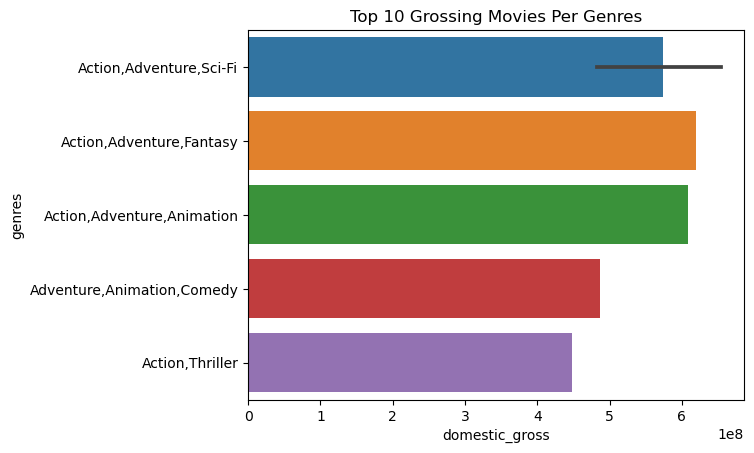

In [68]:
sns.barplot(x="domestic_gross",y=top_gnres.index,data=top_gnres)
plt.title('Top 10 Grossing Movies Per Genres')
plt.show()

In [69]:
#Top grossing studios
top_studio = data.nlargest(100,'domestic_gross')[['studio','domestic_gross']]\
.set_index('studio')

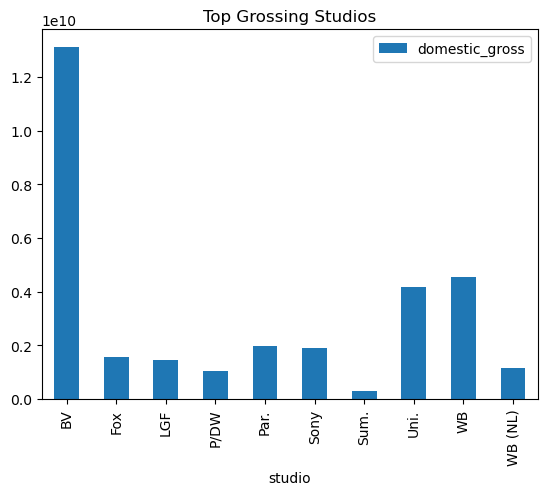

In [70]:
top_studio.groupby('studio').sum().plot(kind='bar')
plt.title('Top Grossing Studios')
plt.show()

In [73]:
#Top grossing movies
top_movs = data.nlargest(10,'foreign_gross')[['title','foreign_gross']]\
.set_index('title')


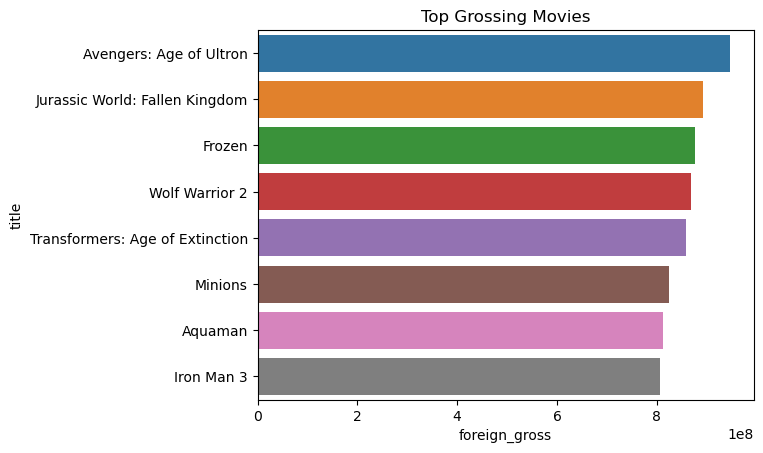

In [76]:
sns.barplot(x="foreign_gross",y=top_movs.index,data=top_movs)
plt.title('Top Grossing Movies')
plt.show()

In [78]:
#Top voted movies
top_vote = data.nlargest(10,'numvotes')[['title','numvotes']].set_index('title')

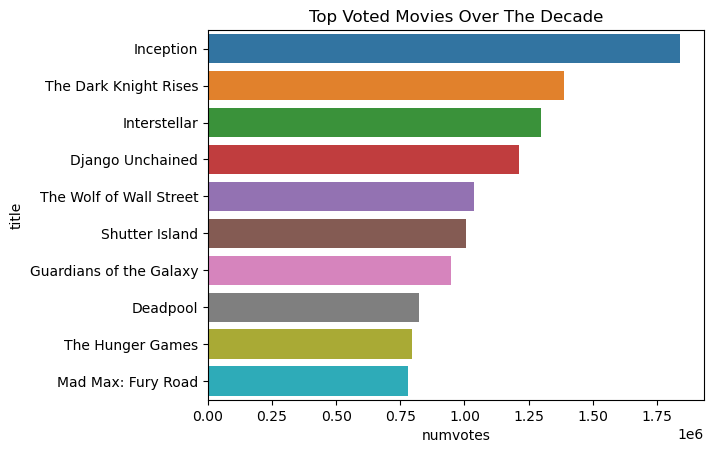

In [80]:
sns.barplot(x="numvotes",y=top_vote.index,data=top_vote)
plt.title('Top Voted Movies Over The Decade')
plt.show()

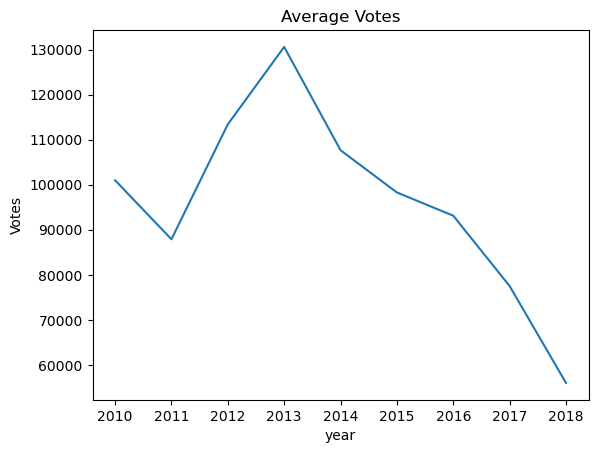

In [81]:
#Finding average rating of movies year wise
avg_rats = data.groupby('year')['numvotes'].mean()
avg_rats.plot(kind='line')
plt.ylabel('Votes')
plt.title('Average Votes')
plt.show()

## Summary

### Findings

- Annual average revenues and movies released declining year on year
- No strong correlation between movie ratings and gross revenues
- Action, Scifi movies highest gross earners
- Average movie runtime 108 minutes
- No direct correlation between runtime and gross revenues generated
- Dominant players (Producers) in the market


### Recomendations & Conclussion

- Reserved Production Budget
- Poduce more Action movies
- Average movie runtime not more than 130 minutes
- Consider partnering with streaming companies to tap into that emerging market